In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
#cargando datos del plebiscito
df_datos = pd.read_csv('./../Datos/VW_VOTARON_2020PLEB_Datos completos.csv',delimiter=';')

In [3]:
#cargando datos geojson
map_data = gpd.read_file('./../Datos/RM_all.geojson')
map_data.head()

,CIR_SENA,COD_COMUNA,DIS_ELEC,NOM_COM,NOM_PROV,NOM_REG,SHAPE_Area,SHAPE_LENG,SHAPE_Le_1,geometry
0,7,1350,31,María Pinto,Melipilla,Región Metropolitana de Santiago,3.945066e+08,109727.643980,109727.644650,"POLYGON ((-71.26654 -33.41009, -71.26572 -33.4..."
1,7,1350,31,San Pedro,Melipilla,Región Metropolitana de Santiago,7.938374e+08,162648.311900,162648.311140,"POLYGON ((-71.53863 -33.76415, -71.53812 -33.7..."
2,7,1310,19,Independencia,Santiago,Región Metropolitana de Santiago,7.514746e+06,11488.695747,11718.687086,"POLYGON ((-70.65730 -33.40478, -70.65729 -33.4..."
3,8,1311,26,La Florida,Santiago,Región Metropolitana de Santiago,7.103733e+07,49696.426792,49621.402174,"POLYGON ((-70.43946 -33.49206, -70.43825 -33.4..."
4,8,1311,23,Lo Barnechea,Santiago,Región Metropolitana de Santiago,1.024735e+09,149539.074262,149865.511039,"POLYGON ((-70.47723 -33.36950, -70.47593 -33.3..."


In [4]:
map_data.columns

Index(['CIR_SENA', 'COD_COMUNA', 'DIS_ELEC', 'NOM_COM', 'NOM_PROV', 'NOM_REG',
       'SHAPE_Area', 'SHAPE_LENG', 'SHAPE_Le_1', 'geometry'],
      dtype='object')

<AxesSubplot:title={'center':'Titulo'}, xlabel='Longitud', ylabel='Latitud'>

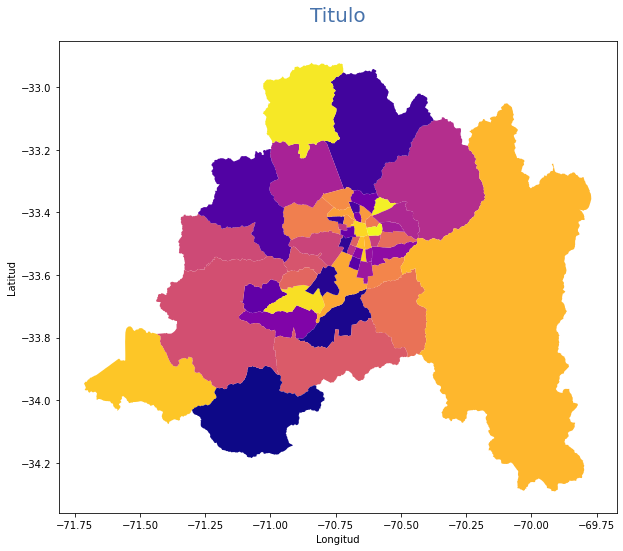

In [5]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(figsize=(10, 10))
 
# Control del título y los ejes
ax.set_title('Titulo', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
# Mostrar el mapa finalizado
map_data.plot(column='NOM_COM', cmap='plasma', ax=ax, zorder=5)

In [6]:
df_datos.head(3)

,Cedula,Circunscripcion,Comuna,DV,Edad,Nacionalidad,Pais Domicilio,Pais Nacimiento,Partido,Provincia,Rango Edad,Region,Sexo,Sufragio,VotoExterior,Número de registros,Votaron
0,0,Coyhaique,Coyhaique,0,22,chilena,Chile,Chile,[130] FEDERACION REGIONALISTA VERDE SOCIAL,Coyhaique,20-24,De Aysen Del General Carlos Ibañez Del Campo,femenino,sufragó,Nacional,1,1.0
1,0,El Puerto,Valparaiso,0,89,chilena,Chile,Chile,SIN PARTIDO,Valparaiso,80 o +,De Valparaiso,femenino,no sufragó,Nacional,1,NaN
2,0,Iquique,Iquique,0,99,chilena,Chile,Chile,SIN PARTIDO,Iquique,80 o +,De Tarapaca,masculino,no sufragó,Nacional,1,NaN


In [7]:
#creando data frame de región metropolitana
df_rm = df_datos[df_datos['Region'] == 'Metropolitana De Santiago']
df_rm.head(2)

,Cedula,Circunscripcion,Comuna,DV,Edad,Nacionalidad,Pais Domicilio,Pais Nacimiento,Partido,Provincia,Rango Edad,Region,Sexo,Sufragio,VotoExterior,Número de registros,Votaron
6,0,El Centro,Santiago,0,106,chilena,Chile,Chile,SIN PARTIDO,Santiago,80 o +,Metropolitana De Santiago,femenino,no sufragó,Nacional,1,NaN
7,0,La Cisterna,La Cisterna,0,100,chilena,Chile,Chile,SIN PARTIDO,Santiago,80 o +,Metropolitana De Santiago,femenino,no sufragó,Nacional,1,NaN


In [8]:
comunas_to_replace = ['Maria Pinto', 'San Joaquin', 'San Ramon', 'Isla De Maipo',
                     'San Jose De Maipo', 'Alhue', 'Curacavi', 'Calera De Tango',
                     'Conchali', 'Peñalolen', 'Maipu', 'Estacion Central']
comunas_new_value = ['María Pinto', 'San Joaquín', 'San Ramón', 'Isla de Maipo',
                    'San José de Maipo', 'Alhué', 'Curacaví', 'Calera de Tango',
                     'Conchalí', 'Peñalolén', 'Maipú', 'Estación Central']

df_rm = df_rm.replace(to_replace = comunas_to_replace,
                                  value = comunas_new_value)

In [10]:
rm_count = df_rm.groupby(['Comuna']).count()[['Cedula','Votaron']].reset_index()
rm_count

,Comuna,Cedula,Votaron
0,Alhué,6004,2613
1,Buin,73511,40251
2,Calera de Tango,22016,12689
3,Cerrillos,67845,37159
4,Cerro Navia,116544,63577
5,Colina,87987,49217
6,Conchalí,119859,65240
7,Curacaví,25834,14702
8,El Bosque,138923,75691
9,El Monte,27418,14993


In [ ]:
#cruzando tablas

In [12]:
merge_df = map_data.merge(rm_count, how = 'left', left_on='NOM_COM', right_on='Comuna').fillna(0)
merge_df.head(2)

,CIR_SENA,COD_COMUNA,DIS_ELEC,NOM_COM,NOM_PROV,NOM_REG,SHAPE_Area,SHAPE_LENG,SHAPE_Le_1,geometry,Comuna,Cedula,Votaron
0,7,1350,31,María Pinto,Melipilla,Región Metropolitana de Santiago,3.945066e+08,109727.64398,109727.64465,"POLYGON ((-71.26654 -33.41009, -71.26572 -33.4...",María Pinto,11262,5468
1,7,1350,31,San Pedro,Melipilla,Región Metropolitana de Santiago,7.938374e+08,162648.31190,162648.31114,"POLYGON ((-71.53863 -33.76415, -71.53812 -33.7...",San Pedro,8246,3025


In [13]:
#agregamos el % de participación como columna a nuestro dataframe
merge_df['participacion'] = np.round(merge_df['Votaron']*100/merge_df['Cedula'],2)

[]

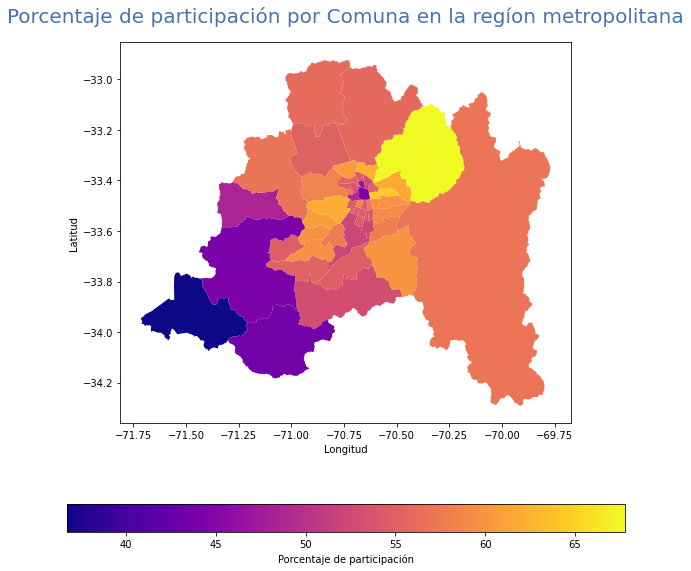

In [24]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(figsize=(10, 10))
 
# Control del título y los ejes
ax.set_title('Porcentaje de participación por Comuna en la regíon metropolitana', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Control del encuadre (área geográfica) del mapa
# ax.axis([-12, 5, 32, 48])

# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="5%", pad=0.2)
 
# Mostrar el mapa finalizado
merge_df.plot(column='participacion',
              cmap='plasma',
              ax=ax, zorder=5, 
              legend=True,
              legend_kwds={'label':'Porcentaje de participación',
                            'orientation':'horizontal'},
              )
plt.plot()

In [25]:
merge_df.head(2)

,CIR_SENA,COD_COMUNA,DIS_ELEC,NOM_COM,NOM_PROV,NOM_REG,SHAPE_Area,SHAPE_LENG,SHAPE_Le_1,geometry,Comuna,Cedula,Votaron,participacion
0,7,1350,31,María Pinto,Melipilla,Región Metropolitana de Santiago,3.945066e+08,109727.64398,109727.64465,"POLYGON ((-71.26654 -33.41009, -71.26572 -33.4...",María Pinto,11262,5468,48.55
1,7,1350,31,San Pedro,Melipilla,Región Metropolitana de Santiago,7.938374e+08,162648.31190,162648.31114,"POLYGON ((-71.53863 -33.76415, -71.53812 -33.7...",San Pedro,8246,3025,36.68


In [29]:
df_partidos = df_datos['Partido'].unique()

In [30]:
type(df_partidos)

numpy.ndarray

In [31]:
df_partidos = pd.DataFrame(df_partidos)

In [34]:
df_partidos

,0
0,[130] FEDERACION REGIONALISTA VERDE SOCIAL
1,SIN PARTIDO
2,[137] PARTIDO LIBERAL DE CHILE
3,[138] CIUDADANOS
4,[3] UNION DEMOCRATA INDEPENDIENTE
5,[2] PARTIDO DEMOCRATA CRISTIANO
6,[143] COMUNES
7,[162] PARTIDO CONSERVADOR CRISTIANO
8,[6] COMUNISTA DE CHILE
9,[1] RENOVACION NACIONAL


In [4]:
df_pp = pd.read_csv('./../Datos/pp.csv')